In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

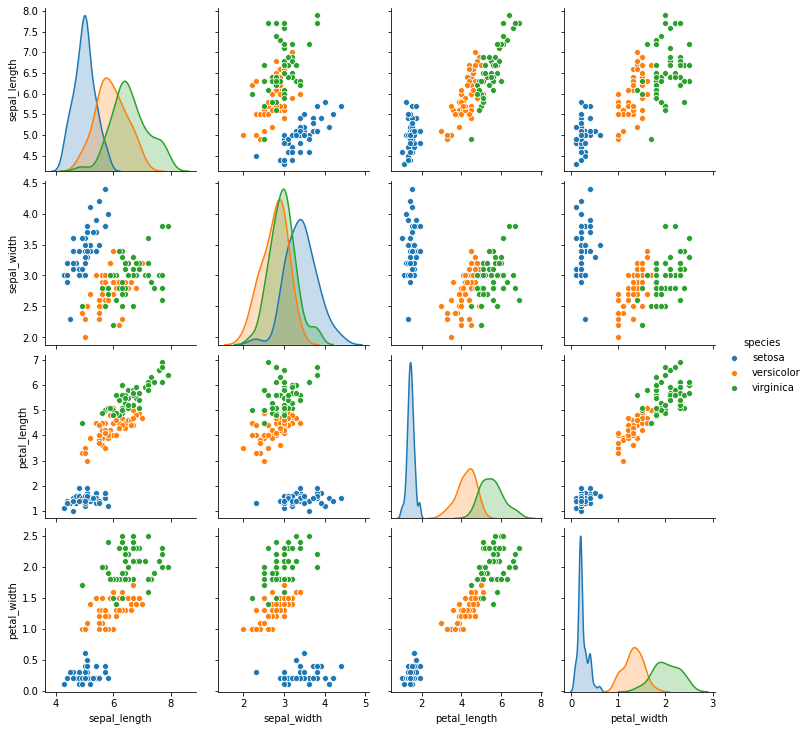

In [3]:
sns.pairplot(iris, hue='species')

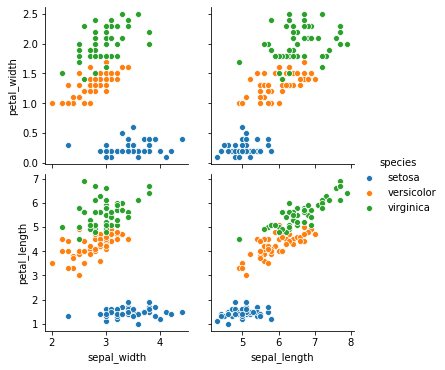

In [26]:
sns.pairplot(iris,x_vars=["sepal_width", "sepal_length"], 
             y_vars=["petal_width", "petal_length"], hue="species")

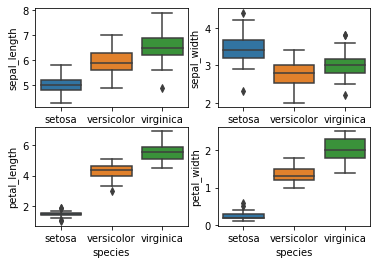

In [6]:
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=iris)

plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=iris)

plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=iris)

plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=iris)

In [27]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


1. 연도별 평균 승객수 -> 꾸준히 증가  
2. 연도별 승객 수 산점도 (+추세선)  
3. 승객수 분포 -> 200~300명대가 가장 많다.  
4. 연도와 월별 승객 수 피벗테이블  -> 히트맵으로 표현

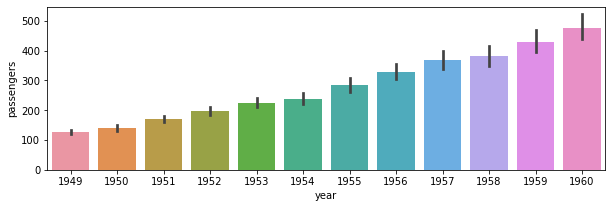

In [14]:
plt.figure(figsize=(10,3))
sns.barplot(data=flights, x='year',y='passengers')

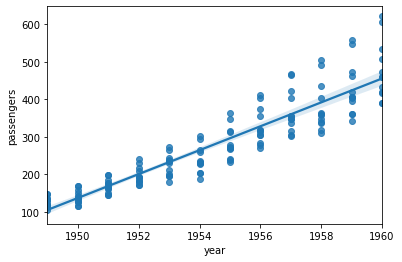

In [28]:
sns.regplot(x='year', y='passengers', data=flights)

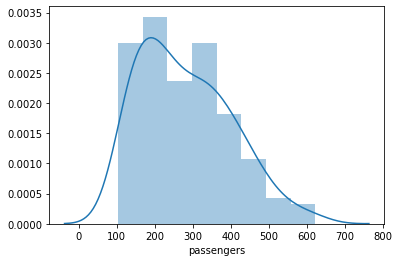

In [16]:
sns.distplot(flights.passengers)

In [67]:
flights_pivot=flights.pivot('month','year','passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


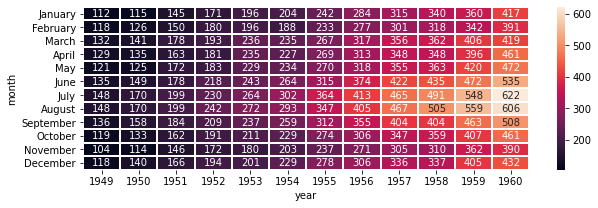

In [68]:
plt.figure(figsize=(10,3))
sns.heatmap(flights_pivot, annot=True, fmt="d", linewidths=1)

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\Users\LG\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


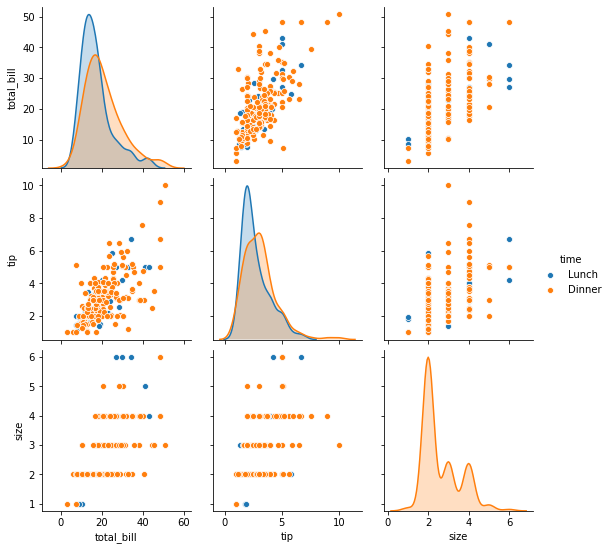

In [39]:
sns.pairplot(data=tips, hue='time')

# 막대그래프 그리는 방법(seaborn, matplotlib, pandas, ggplot2)
하고싶은것=> x는 성별, y값으로 total_bill과 tip의 값 동시에 나타내기  



In [81]:
np.random.seed(1)
groupList=['A','B','C','D']
nSize=20

In [92]:
group=[random.choice(groupList) for _ in range(nSize)]
group

In [94]:
#포아송 분포로 무작위 표본 추출
#일정 시간(공간)에서 무작위로 발생하는 사건의 평균 회수가 lam인 분포
xval=np.random.poisson(lam=10,size=nSize)
xval

array([ 5, 12, 12, 17, 15,  6,  9, 16, 12, 14, 12,  8, 12,  9,  9, 15,  8,
       14, 15,  6])

확률분포 :  이산형, 연속형 확률 분포  
이산형 확률 분포 : 이항분포, 포아송분포, 초기하 분포  
연속 확률 분포 : 정규분포, t분포, f분포, 카이제곱...

**이항 분포 실험**을 반복적으로 시행 -> 두 가지 경우(성공/ 실패)
성공확률 p인 베르누이 시행을 n번 반복했을 때, 성공하는 횟수를 x, 확률변수 x는 모수 n과 p의 이항분포를 따른다


In [97]:
#이항 분포에서 무작위 표본 추출
label=np.random.binomial(n=1,p=0.5,size=nSize)
label

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [99]:
label=list(map(str, label))

In [102]:
df=pd.DataFrame({'xval':xval,
             'group':group,
             'label':label})
df

,xval,group,label
0,5,A,1
1,12,C,0
2,12,D,0
3,17,B,1
4,15,D,0
5,6,B,1
6,9,A,1
7,16,D,1
8,12,D,0
9,14,A,0


In [130]:
df_group=df.pivot_table(index='group', aggfunc='sum')
df_group

,xval
group,
A,63
B,43
C,18
D,102


In [141]:
df_group_label=df.groupby(['group','label'])[['xval']].sum()
df_group_label

xval
group label      
A     0        23
      1        40
B     0        12
      1        31
C     0        12
      1         6
D     0        78
      1        24

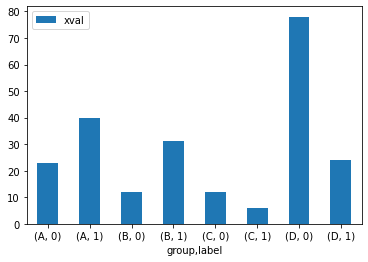

In [120]:
df_group_label.plot.bar(rot=0)

In [131]:
df_group=df_group.reset_index()
df_group

,group,xval
0,A,63
1,B,43
2,C,18
3,D,102


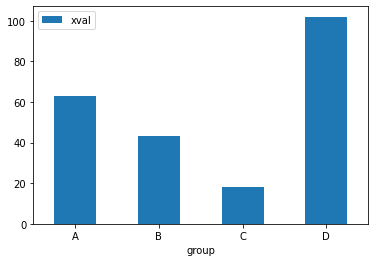

In [132]:
df_group.plot.bar(x='group',y='xval', rot=0)

In [142]:
df_group_label=df_group_label.reset_index()
df_group_label

,group,label,xval
0,A,0,23
1,A,1,40
2,B,0,12
3,B,1,31
4,C,0,12
5,C,1,6
6,D,0,78
7,D,1,24


In [145]:
df_pivot=df_group_label.pivot(index='group',columns='label',values='xval')
df_pivot

label,0,1
group,,
A,23,40
B,12,31
C,12,6
D,78,24


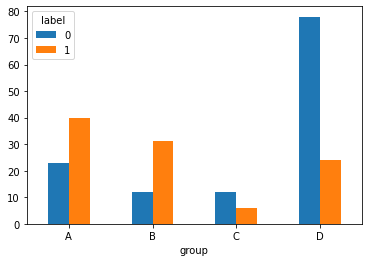

In [146]:
df_pivot.plot.bar(rot=0)

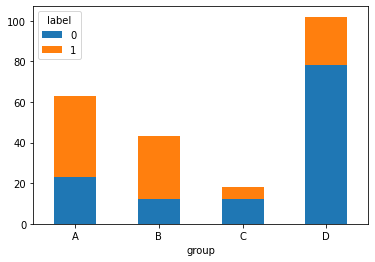

In [147]:
df_pivot.plot.bar(rot=0, stacked=True)

matplotlib으로 시각화~~!!

In [154]:
df_group=df.groupby('group')['xval'].sum()
df_group

group
A     63
B     43
C     18
D    102
Name: xval, dtype: int32

In [157]:
label=df_group.index
label

Index(['A', 'B', 'C', 'D'], dtype='object', name='group')

In [156]:
index=np.arange(len(label))
index

array([0, 1, 2, 3])

<BarContainer object of 4 artists>

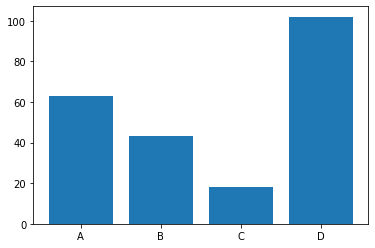

In [159]:
plt.bar(label,df_group)

([<matplotlib.axis.XTick at 0x1e471650760>,
 [Text(0, 0, 'A'), Text(0, 0, 'B'), Text(0, 0, 'C'), Text(0, 0, 'D')])

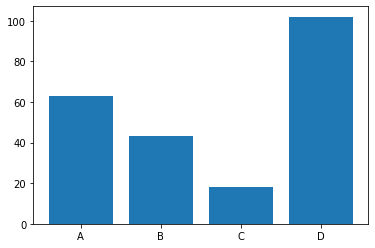

In [161]:
plt.bar(index,df_group)
plt.xticks(index,label)

([<matplotlib.axis.YTick at 0x1e46eff2ac0>,
 [Text(0, 0, 'A'), Text(0, 0, 'B'), Text(0, 0, 'C'), Text(0, 0, 'D')])

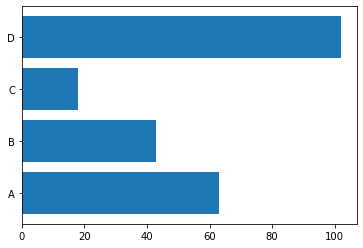

In [164]:
plt.barh(index, df_group)
plt.yticks(index,label, fontsize=10)

In [170]:
df

,xval,group,label
0,5,A,1
1,12,C,0
2,12,D,0
3,17,B,1
4,15,D,0
5,6,B,1
6,9,A,1
7,16,D,1
8,12,D,0
9,14,A,0


In [172]:
df[df['label']=='0']

,xval,group,label
1,12,C,0
2,12,D,0
4,15,D,0
8,12,D,0
9,14,A,0
12,12,B,0
13,9,A,0
14,9,D,0
15,15,D,0
18,15,D,0


In [174]:
df_group0=df[df['label']=='0'].groupby(['group'])['xval'].sum()
df_group0

group
A    23
B    12
C    12
D    78
Name: xval, dtype: int32

In [175]:
df_group1=df[df['label']=='1'].groupby(['group'])['xval'].sum()
df_group1

group
A    40
B    31
C     6
D    24
Name: xval, dtype: int32

In [178]:
#x축:group 
#y축:xval 합계
#막대바:label(0,1)
label=df.group.unique()
label=sorted(label)
label
index=np.arange(len(label))

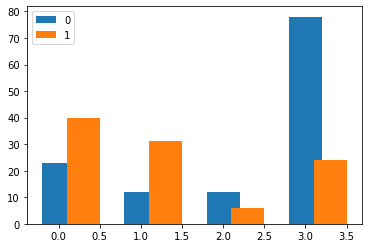

In [195]:
#직접 조절해서 위치 변화시켜서 예쁘게
p1=plt.bar(index,df_group0, width=0.4)
p2=plt.bar(index+0.3,df_group1, width=0.4)
plt.legend((p1[0],p2[0]), ('0','1'), loc=2)

seaborn으로 바그래프 출력
matplotlib으로

In [197]:
df_group=df.groupby('group')['xval'].sum()
df_group

group
A     63
B     43
C     18
D    102
Name: xval, dtype: int32

In [219]:
df_group=df.groupby(['group','label'])[['xval']].sum().reset_index()
df_group

,group,label,xval
0,A,0,23
1,A,1,40
2,B,0,12
3,B,1,31
4,C,0,12
5,C,1,6
6,D,0,78
7,D,1,24


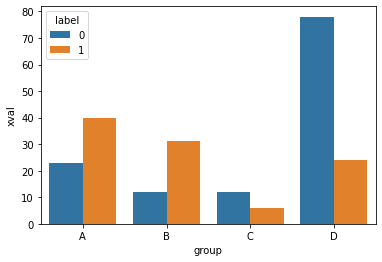

In [207]:
sns.barplot(x='group',y='xval',data=df_group, hue='label')

In [209]:
df_group0=df[df['label']=='0'].groupby(['group'])['xval'].sum().reset_index()
df_group0

,group,xval
0,A,23
1,B,12
2,C,12
3,D,78


In [224]:
df_groupy=df.groupby('group')['xval'].sum().reset_index()
df_groupy

,group,xval
0,A,63
1,B,43
2,C,18
3,D,102


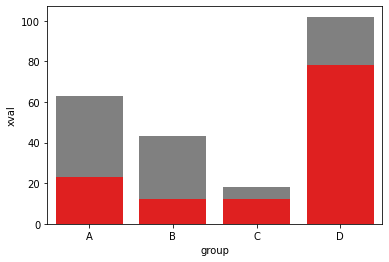

In [228]:
sns.barplot(x='group',y='xval',data=df_groupy, color='grey')
sns.barplot(x='group',y='xval',data=df_group0, color='red')

## r의 ggplot2

In [229]:
pip install plotnine


  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\LG\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



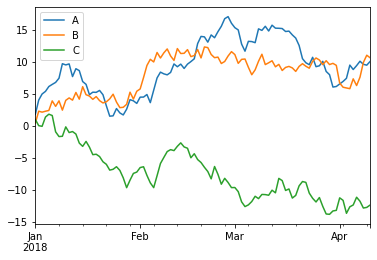

# =============================

tips로 적용해보기

In [167]:
io=tips.groupby('sex')['total_bill','tip'].sum()
io

<ipython-input-167-f0e5cb14b2fe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  io=tips.groupby('sex')['total_bill','tip'].sum()


,total_bill,tip
sex,,
Male,3256.82,485.07
Female,1570.95,246.51


Text(0.5, 1.0, 'total and tip ratio by gender')

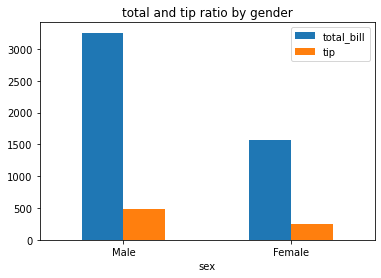

In [169]:
io.plot.bar(rot=0)
plt.title('total and tip ratio by gender')

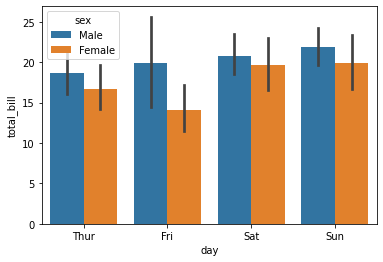

In [48]:
sns.barplot(x='day',y='total_bill',data=tips, hue='sex')

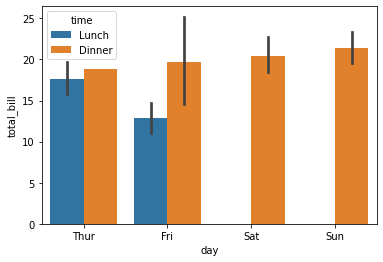

In [51]:
sns.barplot(x='day',y='total_bill',data=tips, hue='time')

In [ ]:
sns.boxplot(x='day',y='total_bill',data=tips)
#극단치 없애기

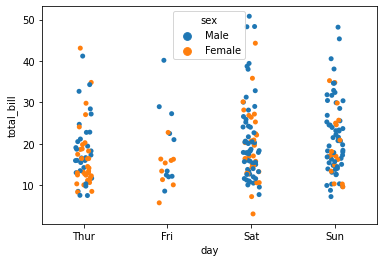

In [44]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex', jitter=True)
#jitter=True 겹친 정도 줄이기


In [ ]:
sns.swarmplot(x='day',y='total_bill',data=tips, hue='sex') #하나도 안겹치게

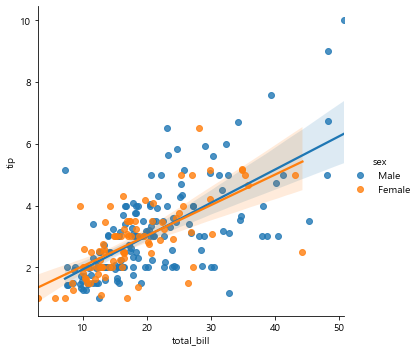

In [60]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex')

Text(0.5, 1.0, 'Kernel Density Plot')

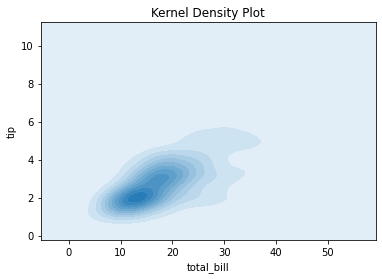

In [33]:
prac=sns.kdeplot(data=tips.total_bill, data2=tips.tip,
           shade=True)
prac.set_title('Kernel Density Plot')

In [51]:
#한글등록
from matplotlib import font_manager, rc  # rc : resource

# 추가설정 : 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-' 를 변경하지 않도록 지정
plt.rcParams['axes.unicode_minus']=False 

fong_loc = "c:/Windows/Fonts/malgun.ttf" # 글꼴 경로
font_name = font_manager.FontProperties(fname=fong_loc).get_name()
# print(font_name)                       # 폰트매니저를 통해 인식하고 있는 글꼴 이름을 가져옴
rc('font', family=font_name)             # 리소스에 글꼴을 등록

폰트 종류 

In [ ]:
from matplotlib import font_manager

font_manager.fontManager.ttflist

In [61]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Text(0.5, 1.0, 'did they live?')

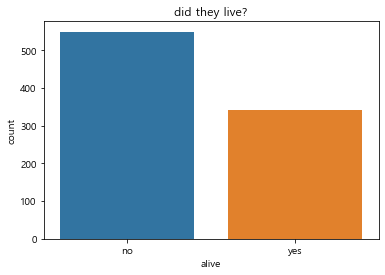

In [74]:
sns.countplot(titanic.alive)
plt.title('did they live?')

Text(0.5, 1.0, 'who lived?')

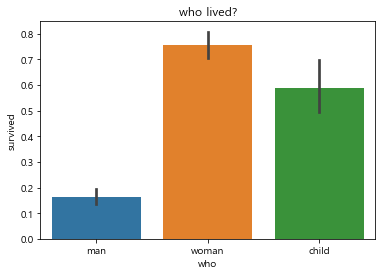

In [76]:
sns.barplot(x='who',y='survived',data=titanic)
plt.title('who lived?')

Text(0.5, 1.0, 'from where survived?')

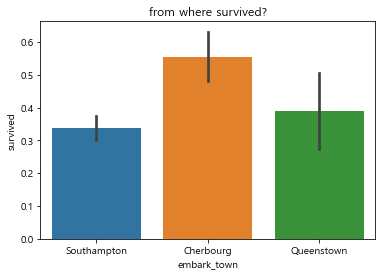

In [79]:
sns.barplot(x='embark_town',y='survived',data=titanic)
plt.title('from where survived?')

Text(0.5, 1.0, 'were they alone?')

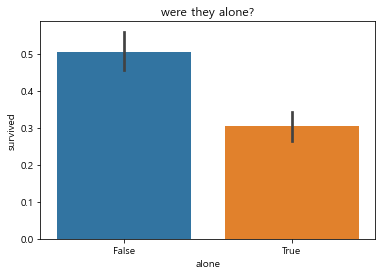

In [81]:
sns.barplot(x='alone',y='survived',data=titanic)
plt.title('were they alone?')

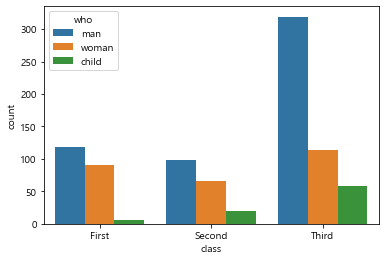

In [83]:
sns.countplot(x='class',hue='who',data=titanic)

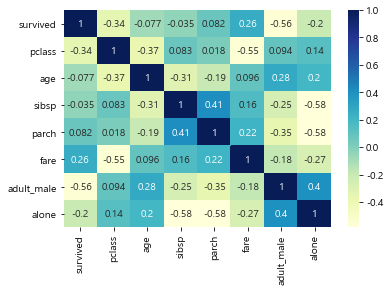

In [86]:
sns.heatmap(titanic.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [29]:
titanic.groupby(['class','sex']).count().unstack()

survived      pclass         age       sibsp       parch       ...  \
sex      female male female male female male female male female male  ...   
class                                                                 ...   
First        94  122     94  122     85  101     94  122     94  122  ...   
Second       76  108     76  108     74   99     76  108     76  108  ...   
Third       144  347    144  347    102  253    144  347    144  347  ...   

       adult_male        deck      embark_town       alive       alone       
sex        female male female male      female male female male female male  
class                                                                        
First          94  122     81   94          92  122     94  122     94  122  
Second         76  108     10    6          76  108     76  108     76  108  
Third         144  347      6    6         144  347    144  347    144  347  

[3 rows x 26 columns]

In [28]:
titanic.groupby(['class','sex']).size().unstack()

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


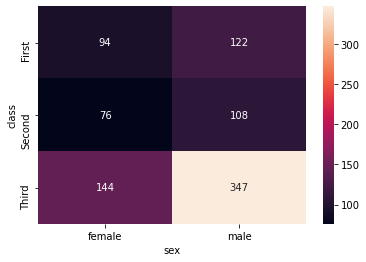

In [39]:
af=titanic.pivot_table(index='class',columns='sex',aggfunc='size')

sns.heatmap(af, annot=True, fmt="d")

#색상참고
#http://seaborn.pydata.org/generated/seaborn.heatmap.html


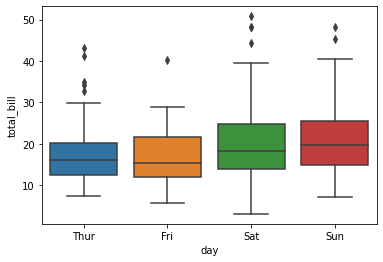

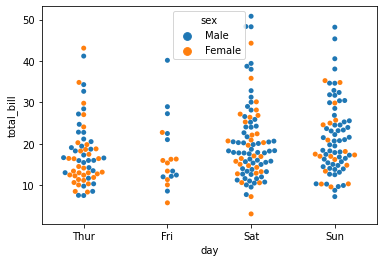

# 시계열 분석(꺾은선 그래프)

In [231]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


In [237]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

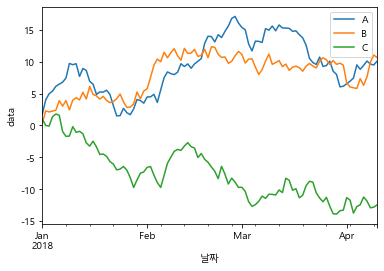

In [238]:
df1.plot()
plt.xlabel('날짜')
plt.ylabel('data')
plt.show()

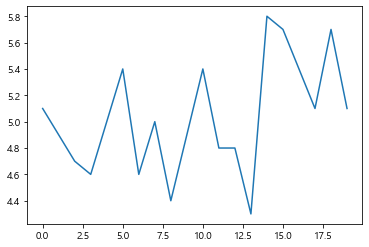

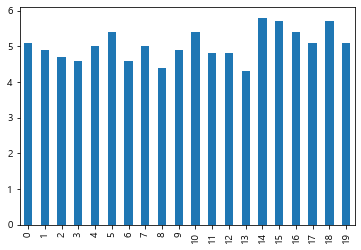

In [244]:
iris.sepal_length[:20].plot()
plt.show()
iris.sepal_length[:20].plot(kind='bar')

In [243]:
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


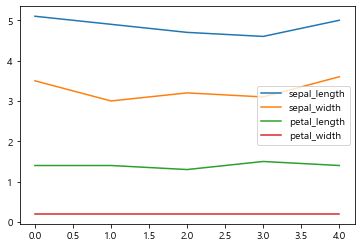

In [242]:
iris[:5].plot()

(0.0, 7.0)

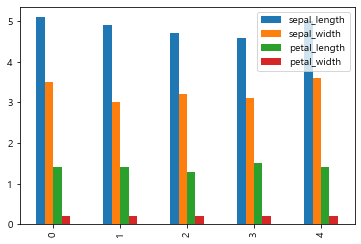

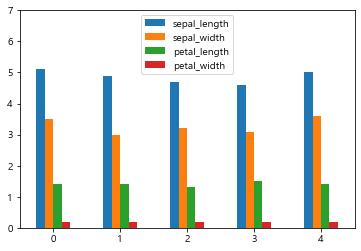

In [248]:
iris[:5].plot.bar()
iris[:5].plot(kind='bar',rot=0)
plt.ylim(0,7)

In [249]:
#종별 각 feature 평균

In [264]:
iris_df=iris.groupby('species').mean()
iris_df.columns.name='feature'
iris_df

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


(0.0, 8.0)

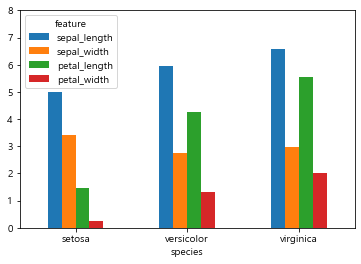

In [268]:
iris_df.plot.bar(rot=0)
plt.ylim(0,8)

In [269]:
iris_df.T

species,setosa,versicolor,virginica
feature,,,
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


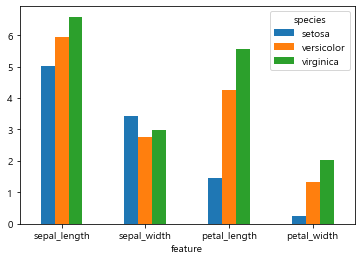

In [270]:
iris_df.T.plot.bar(rot=0)

In [271]:
#선실별 승객 비율

In [273]:
tp=titanic.pclass.value_counts()
tp

3    491
1    216
2    184
Name: pclass, dtype: int64

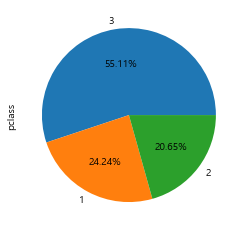

In [274]:
tp.plot.pie(autopct="%.2f%%")

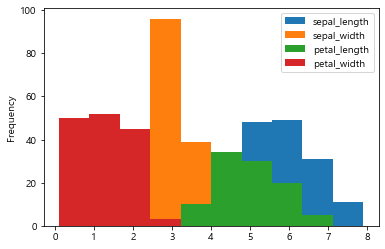

In [275]:
iris.plot.hist()

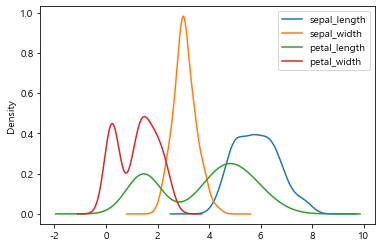

In [276]:
iris.plot.kde()

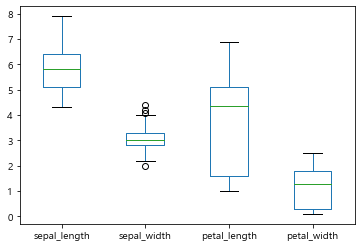

In [277]:
iris.plot.box()

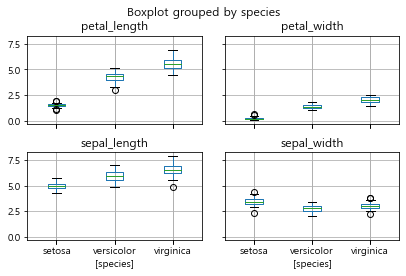

In [285]:
#종 별로 박스플랏
iris.boxplot(by='species')
plt.tight_layout(pad=2, h_pad=1, w_pad=2)
plt.show()